V2 limpia

In [88]:
# 📦 Imports
import pandas as pd
import joblib
import zipfile
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt

In [89]:

# 📥 Cargar ambos datasets procesados y unirlos
DATASETS = ["dataset1", "dataset2"]
frames = []

Leemos los dataset desde zip

In [90]:
for name in DATASETS:
    with zipfile.ZipFile(f"{name}_procesado.zip", 'r') as zip_ref:
        zip_ref.extractall("./")
    df_temp = pd.read_csv(f"{name}_procesado.csv")
    df_temp["source"] = name  # Para saber de dónde viene cada fila
    frames.append(df_temp)

In [91]:
# 🔗 Unir datasets
combined_df = pd.concat(frames, ignore_index=True)
print(f"✅ Datasets unidos: {combined_df.shape[0]} filas")

✅ Datasets unidos: 1676567 filas


In [92]:
combined_df['combined_text']

0          Digital Marketing Specialist social media mana...
1          Web Developer frontend web developers design a...
2          Operations Manager quality control managers es...
3          Network Engineer wireless network engineers de...
4          Event Manager a conference manager coordinates...
                                 ...                        
1676562                                                  NaN
1676563                                                  NaN
1676564                                                  NaN
1676565                                                  NaN
1676566                                                  NaN
Name: combined_text, Length: 1676567, dtype: object

In [93]:
combined_df["full_text_df1"] = combined_df['combined_text']

In [94]:
combined_df["full_text_combined"] = (
    combined_df["full_text_df1"].fillna("") + " " +
    combined_df["full_text"].fillna("")
).str.strip()

In [95]:
combined_df["job title"]

0          Digital Marketing Specialist
1                         Web Developer
2                    Operations Manager
3                      Network Engineer
4                         Event Manager
                       ...             
1676562                             NaN
1676563                             NaN
1676564                             NaN
1676565                             NaN
1676566                             NaN
Name: job title, Length: 1676567, dtype: object

In [96]:
# 🔠 Vectorización conjunta del texto
vectorizer = TfidfVectorizer(
    max_features=1500,
    stop_words='english',
    max_df=0.85,
    min_df=5,
    ngram_range=(1, 2)
)
combined_df = combined_df.dropna(subset=["full_text_combined"])
combined_df = combined_df[combined_df["full_text_combined"].str.strip() != ""]
text_features = vectorizer.fit_transform(combined_df["full_text_combined"])
print("✅ TF-IDF aplicado al texto combinado")

✅ TF-IDF aplicado al texto combinado


In [97]:
import pandas as pd

# Cargar el CSV con las skills desde O*NET
df_skills = pd.read_csv("dataset4/Skills.csv", sep=";")  # Ajusta el nombre si es distinto

# Verificar columnas disponibles
print(df_skills.columns)

Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound',
       'Upper CI Bound', 'Recommend Suppress', 'Not Relevant', 'Date',
       'Domain Source'],
      dtype='object')


In [98]:
df_knowledge = pd.read_csv("dataset4/Knowledge.csv", sep=";")

In [99]:
# Obtener todos los nombres de skills y conocimientos sin filtro
skills_filtered = df_skills["Element Name"].dropna().str.lower().str.strip().unique().tolist()
knowledge_filtered = df_knowledge["Element Name"].dropna().str.lower().str.strip().unique().tolist()

aqui cogemos lños de onet que no sean nan, las pasamos a minusculas, separamos que sean unicas  y en una lista y quitamos espacios delante y detras


In [100]:
all_terms = list(set(skills_filtered + knowledge_filtered))

all_terms

['repairing',
 'equipment selection',
 'active listening',
 'sociology and anthropology',
 'chemistry',
 'engineering and technology',
 'negotiation',
 'fine arts',
 'science',
 'administrative',
 'mathematics',
 'foreign language',
 'law and government',
 'technology design',
 'judgment and decision making',
 'coordination',
 'management of material resources',
 'public safety and security',
 'operation and control',
 'psychology',
 'transportation',
 'operations analysis',
 'personnel and human resources',
 'philosophy and theology',
 'sales and marketing',
 'economics and accounting',
 'social perceptiveness',
 'persuasion',
 'writing',
 'biology',
 'time management',
 'systems analysis',
 'communications and media',
 'administration and management',
 'english language',
 'therapy and counseling',
 'design',
 'education and training',
 'computers and electronics',
 'management of personnel resources',
 'food production',
 'learning strategies',
 'building and construction',
 'readin

In [101]:
skills_filtered

['reading comprehension',
 'active listening',
 'writing',
 'speaking',
 'mathematics',
 'science',
 'critical thinking',
 'active learning',
 'learning strategies',
 'monitoring',
 'social perceptiveness',
 'coordination',
 'persuasion',
 'negotiation',
 'instructing',
 'service orientation',
 'complex problem solving',
 'operations analysis',
 'technology design',
 'equipment selection',
 'installation',
 'programming',
 'operations monitoring',
 'operation and control',
 'equipment maintenance',
 'troubleshooting',
 'repairing',
 'quality control analysis',
 'judgment and decision making',
 'systems analysis',
 'systems evaluation',
 'time management',
 'management of financial resources',
 'management of material resources',
 'management of personnel resources']

In [102]:
from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()
for skill in all_terms:
    keyword_processor.add_keyword(skill)

aplicar a lo que haya puesto en los full_text

In [103]:
# Aplicar al campo 'description'
combined_df["skills_extraidas"] = combined_df["full_text_combined"].fillna("").apply(
    lambda x: ", ".join(sorted(set(keyword_processor.extract_keywords(x.lower()))))
)

In [104]:
from collections import Counter

skills_detected = combined_df["skills_extraidas"].dropna().str.split(", ").explode()
top_terms = Counter(skills_detected).most_common(30)

print("🎯 Términos más detectados:")
for skill, count in top_terms:
    print(f" - {skill}: {count}")

🎯 Términos más detectados:
 - : 644443
 - design: 427238
 - transportation: 349349
 - troubleshooting: 121530
 - coordination: 115733
 - negotiation: 112802
 - writing: 67448
 - administrative: 63540
 - programming: 52122
 - monitoring: 47398
 - time management: 41777
 - psychology: 38056
 - mechanical: 30809
 - critical thinking: 15008
 - installation: 12508
 - science: 11121
 - administration and management: 10399
 - chemistry: 7518
 - active listening: 7148
 - systems analysis: 7141
 - fine arts: 3705
 - equipment selection: 3648
 - therapy and counseling: 3454
 - speaking: 1424
 - sales and marketing: 906
 - biology: 884
 - mathematics: 867
 - persuasion: 575
 - telecommunications: 489
 - english language: 472


In [105]:
### 2. Combinar texto base para clustering (puedes ajustar esta fusión)
combined_df["text_for_clustering"] = combined_df["skills_extraidas"].fillna("") + " " + combined_df["full_text_combined"].fillna("")

combined_df["text_for_clustering"]

0           Digital Marketing Specialist social media man...
1          design Web Developer frontend web developers d...
2           Operations Manager quality control managers e...
3          design, transportation, troubleshooting Networ...
4          coordination Event Manager a conference manage...
                                 ...                        
1676562     area director of business development nexion ...
1676563     area director of business development nexion ...
1676564     area director of business development nexion ...
1676565     area director of business development nexion ...
1676566     area director of business development nexion ...
Name: text_for_clustering, Length: 1676567, dtype: object

In [106]:
### 3. TF-IDF sobre el texto combinado
tfidf = TfidfVectorizer(
    max_features=1500,
    stop_words="english",
    ngram_range=(1, 2),
    max_df=0.85,
    min_df=5
)
X = tfidf.fit_transform(combined_df["text_for_clustering"])
print("✅ TF-IDF vector shape:", X.shape)

✅ TF-IDF vector shape: (1676567, 1500)


KMEANS

In [107]:
k = 37
kmeans = KMeans(n_clusters=k, random_state=42)
combined_df["cluster"] = kmeans.fit_predict(X)

In [108]:
from collections import Counter

for cluster_id in sorted(combined_df["cluster"].dropna().unique()):
    subset = combined_df[combined_df["cluster"] == cluster_id]
    
    skills_col = subset["skills_extraidas"].dropna()
    skills_exploded = skills_col.str.split(", ").explode()
    skills_cleaned = skills_exploded[skills_exploded.str.strip() != ""]
    
    total_ofertas = subset.shape[0]
    total_con_skills = skills_col.shape[0]

    print(f"\n🟦 Clúster {cluster_id} — {total_ofertas} ofertas / {total_con_skills} con skills extraídas")

    if not skills_cleaned.empty:
        print("🔝 Top 10 skills/conocimientos:")
        for skill, count in Counter(skills_cleaned).most_common(10):
            print(f" - {skill}: {count}")
    else:
        print("⚠️ No hay skills extraídas en este clúster.")



🟦 Clúster 0 — 13859 ofertas / 13859 con skills extraídas
🔝 Top 10 skills/conocimientos:
 - design: 13843
 - transportation: 8273
 - mechanical: 29
 - writing: 13
 - coordination: 9
 - troubleshooting: 6
 - installation: 4
 - critical thinking: 4
 - monitoring: 4
 - programming: 2

🟦 Clúster 1 — 41505 ofertas / 41505 con skills extraídas
🔝 Top 10 skills/conocimientos:
 - negotiation: 38018
 - transportation: 8466
 - time management: 8
 - monitoring: 5
 - coordination: 4
 - writing: 3
 - critical thinking: 2
 - science: 2

🟦 Clúster 2 — 48249 ofertas / 48249 con skills extraídas
🔝 Top 10 skills/conocimientos:
 - negotiation: 14213
 - transportation: 9182
 - persuasion: 470
 - sales and marketing: 313
 - time management: 233
 - administrative: 197
 - design: 161
 - monitoring: 147
 - coordination: 138
 - speaking: 109

🟦 Clúster 3 — 34731 ofertas / 34731 con skills extraídas
🔝 Top 10 skills/conocimientos:
 - writing: 10373
 - transportation: 7012
 - design: 6899
 - programming: 6
 - engl

In [109]:
from collections import Counter

for cluster_id in sorted(combined_df["cluster"].dropna().unique()):
    subset = combined_df[combined_df["cluster"] == cluster_id]

    skills_col = subset["skills_extraidas"].dropna()
    skills_exploded = skills_col.str.split(", ").explode()
    skills_cleaned = skills_exploded[skills_exploded.str.strip() != ""]

    total_ofertas = subset.shape[0]
    total_con_skills = skills_col.shape[0]

    print(f"\n🟦 Clúster {int(cluster_id)} — {total_ofertas} ofertas / {total_con_skills} con skills extraídas")

    # 🔹 Skills más comunes
    if not skills_cleaned.empty:
        print("🔝 Top 10 skills/conocimientos:")
        for skill, count in Counter(skills_cleaned).most_common(10):
            print(f" - {skill}: {count}")
    else:
        print("⚠️ No hay skills extraídas en este clúster.")

    # 🔹 Títulos reales más comunes
    title_counts = subset["job title"].dropna().value_counts().head(5)
    if not title_counts.empty:
        print("📌 Títulos de puestos más comunes (job_title):")
        for title, count in title_counts.items():
            print(f" - {title} ({count})")
    else:
        print("⚠️ No hay títulos disponibles en 'job_title'")




🟦 Clúster 0 — 13859 ofertas / 13859 con skills extraídas
🔝 Top 10 skills/conocimientos:
 - design: 13843
 - transportation: 8273
 - mechanical: 29
 - writing: 13
 - coordination: 9
 - troubleshooting: 6
 - installation: 4
 - critical thinking: 4
 - monitoring: 4
 - programming: 2
📌 Títulos de puestos más comunes (job_title):
 - Civil Engineer (10285)
 - Urban Planner (3505)

🟦 Clúster 1 — 41505 ofertas / 41505 con skills extraídas
🔝 Top 10 skills/conocimientos:
 - negotiation: 38018
 - transportation: 8466
 - time management: 8
 - monitoring: 5
 - coordination: 4
 - writing: 3
 - critical thinking: 2
 - science: 2
📌 Títulos de puestos más comunes (job_title):
 - Procurement Specialist (17348)
 - Procurement Manager (17226)
 - Procurement Coordinator (3424)
 - Purchasing Agent (3419)

🟦 Clúster 2 — 48249 ofertas / 48249 con skills extraídas
🔝 Top 10 skills/conocimientos:
 - negotiation: 14213
 - transportation: 9182
 - persuasion: 470
 - sales and marketing: 313
 - time management: 233

A tabla

In [110]:
# Agrupar skills por clúster y cruzar con áreas de conocimiento
cluster_knowledge_summary = []

for cluster_id in sorted(combined_df["cluster"].dropna().unique()):
    subset = combined_df[combined_df["cluster"] == cluster_id]
    skills = subset["skills_extraidas"].dropna().str.lower().str.split(", ").explode()
    matched_knowledge = skills[skills.isin(knowledge_filtered)]
    
    # Contar ocurrencias de cada término de conocimiento
    top_knowledge = matched_knowledge.value_counts().head(5).to_dict()
    cluster_knowledge_summary.append({
        "cluster": int(cluster_id),
        "num_offers": len(subset),
        "matched_knowledge_terms": top_knowledge
    })



summary_df = pd.DataFrame(cluster_knowledge_summary)
summary_df

,cluster,num_offers,matched_knowledge_terms
0,0,13859,"{'design': 13843, 'transportation': 8273, 'mec..."
1,1,41505,{'transportation': 8466}
2,2,48249,"{'transportation': 9182, 'sales and marketing'..."
3,3,34731,"{'transportation': 7012, 'design': 6899, 'engl..."
4,4,69718,"{'transportation': 13850, 'administrative': 44..."
5,5,87524,"{'design': 27891, 'transportation': 17319, 'ad..."
6,6,24667,"{'transportation': 4935, 'design': 55, 'admini..."
7,7,21209,"{'design': 21206, 'transportation': 4071, 'fin..."
8,8,20911,"{'transportation': 4131, 'mechanical': 2, 'adm..."
9,9,101919,"{'transportation': 20197, 'design': 7215, 'sal..."


In [111]:
from collections import Counter

# Nueva lista para los resultados
resumen = []

# Iterar por cada clúster
for cluster_id in sorted(combined_df["cluster"].dropna().unique()):
    subset = combined_df[combined_df["cluster"] == cluster_id]
    
    # Extraer skills como lista
    all_terms = subset["skills_extraidas"].dropna().str.split(", ").explode()
    
    # Contar
    term_counts = Counter(all_terms)
    
    if term_counts:
        main_term = term_counts.most_common(1)[0][0]
    else:
        main_term = "sin datos"
    
    resumen.append({
        "cluster": cluster_id,
        "num_offers": len(subset),
        "main_term": main_term,
        "term_counts": dict(term_counts)
    })

# Crear el nuevo dataframe
df_summary = pd.DataFrame(resumen)

In [112]:
import plotly.express as px

fig = px.sunburst(
    df_summary,
    path=["main_term", "cluster"],
    values="num_offers",
    color="main_term",
    title="Distribución jerárquica por término más frecuente (skills o conocimientos)"
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [113]:
def get_main_term_filtered(term_counts):
    if isinstance(term_counts, dict):
        # Filtrar términos vacíos, 'design' y 'transportation'
        filtered = {k: v for k, v in term_counts.items() if k.strip() not in ["",]}
        if filtered:
            return max(filtered, key=filtered.get)
    return "sin datos"

df_summary["main_term_filtered"] = df_summary["term_counts"].apply(get_main_term_filtered)


In [114]:
fig = px.sunburst(
    df_summary,
    path=["main_term_filtered", "cluster"],
    values="num_offers",
    color="main_term_filtered",
    title="Distribución jerárquica por término más frecuente (filtrado)"
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [115]:
def get_main_term_filtered(term_counts):
    if isinstance(term_counts, dict):
        # Filtrar términos vacíos, 'design' y 'transportation'
        filtered = {k: v for k, v in term_counts.items() if k.strip() not in ["","transportation", "design"]}
        if filtered:
            return max(filtered, key=filtered.get)
    return "sin datos"

df_summary["main_term_filtered"] = df_summary["term_counts"].apply(get_main_term_filtered)

In [116]:
fig = px.sunburst(
    df_summary,
    path=["main_term_filtered", "cluster"],
    values="num_offers",
    color="main_term_filtered",
    title="Distribución jerárquica por término más frecuente (filtrado)"
)
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

In [118]:
# Explota la columna de skills (ya separadas por comas)
all_skills = combined_df["skills_extraidas"].dropna().str.split(", ").explode().str.lower().str.strip()

# Elimina duplicados y valores vacíos
unique_skills = all_skills[all_skills != ""].drop_duplicates().tolist()

print(f"🔎 Total de habilidades únicas detectadas: {len(unique_skills)}")

🔎 Total de habilidades únicas detectadas: 55


In [119]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")  # Ligero y efectivo
skill_embeddings = model.encode(unique_skills, show_progress_bar=True)

Batches: 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]


In [120]:
from sklearn.cluster import KMeans
import pandas as pd

n_clusters = 35  # ajusta según el nivel de granularidad que desees
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(skill_embeddings)

skill_cluster_df = pd.DataFrame({
    "skill": unique_skills,
    "cluster": labels
})

In [121]:
skill_to_cluster = dict(zip(skill_cluster_df["skill"], skill_cluster_df["cluster"]))

# Función para mapear clústeres a cada fila
def map_skill_clusters(skill_list):
    if not isinstance(skill_list, str):
        return []
    skills = [s.strip().lower() for s in skill_list.split(",")]
    return [skill_to_cluster.get(s) for s in skills if skill_to_cluster.get(s) is not None]

combined_df["skill_clusters"] = combined_df["skills_extraidas"].apply(map_skill_clusters)


In [122]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las habilidades por clúster de habilidades
skill_counts = skill_cluster_df.groupby("cluster")["skill"].apply(list).reset_index()
skill_counts["n_skills"] = skill_counts["skill"].apply(len)

# Mostrar las 5 primeras filas como ejemplo
skill_counts_sorted = skill_counts.sort_values("n_skills", ascending=False)

# Crear una tabla visual de los top skills por cluster
top_skills_per_cluster = []
for i, row in skill_counts_sorted.iterrows():
    cluster_id = row["cluster"]
    skills = row["skill"]
    top_skills = ", ".join(skills[:10])  # Mostrar solo las 10 primeras
    top_skills_per_cluster.append((cluster_id, len(skills), top_skills))

# Convertir a DataFrame
top_skills_df = pd.DataFrame(top_skills_per_cluster, columns=["Cluster", "N_skills", "Top_skills"])
top_skills_df


,Cluster,N_skills,Top_skills
0,3,5,"science, chemistry, biology, mathematics, physics"
1,5,3,"mechanical, education and training, engineerin..."
2,13,3,"active listening, learning strategies, active ..."
3,26,3,"design, technology design, building and constr..."
4,18,2,"english language, foreign language"
5,1,2,"writing, reading comprehension"
6,16,2,"psychology, therapy and counseling"
7,15,2,"telecommunications, communications and media"
8,12,2,"monitoring, operations monitoring"
9,11,2,"food production, production and processing"


In [123]:
top_skills_df["Top_skills"][26]

'service orientation'

✅ 5. Analizar por clúster de ofertas

In [124]:
from collections import Counter

for cluster_id in sorted(combined_df["cluster"].dropna().unique()):
    subset = combined_df[combined_df["cluster"] == cluster_id]
    skill_clusters = subset["skill_clusters"].explode().dropna()
    top_clusters = Counter(skill_clusters).most_common(100)
    print(f"\n🟦 Clúster de ofertas {cluster_id}:")
    for c, count in top_clusters:
        print(f" - Skill Cluster {c}: {count} ocurrencias")


🟦 Clúster de ofertas 0:
 - Skill Cluster 26: 13843 ocurrencias
 - Skill Cluster 2: 8273 ocurrencias
 - Skill Cluster 5: 29 ocurrencias
 - Skill Cluster 1: 13 ocurrencias
 - Skill Cluster 7: 9 ocurrencias
 - Skill Cluster 29: 6 ocurrencias
 - Skill Cluster 3: 4 ocurrencias
 - Skill Cluster 10: 4 ocurrencias
 - Skill Cluster 25: 4 ocurrencias
 - Skill Cluster 12: 4 ocurrencias
 - Skill Cluster 33: 2 ocurrencias

🟦 Clúster de ofertas 1:
 - Skill Cluster 8: 38018 ocurrencias
 - Skill Cluster 2: 8466 ocurrencias
 - Skill Cluster 4: 8 ocurrencias
 - Skill Cluster 12: 5 ocurrencias
 - Skill Cluster 7: 4 ocurrencias
 - Skill Cluster 1: 3 ocurrencias
 - Skill Cluster 25: 2 ocurrencias
 - Skill Cluster 3: 2 ocurrencias

🟦 Clúster de ofertas 2:
 - Skill Cluster 8: 14213 ocurrencias
 - Skill Cluster 2: 9182 ocurrencias
 - Skill Cluster 20: 470 ocurrencias
 - Skill Cluster 31: 313 ocurrencias
 - Skill Cluster 4: 233 ocurrencias
 - Skill Cluster 9: 197 ocurrencias
 - Skill Cluster 26: 161 ocurrenci

<Figure size 1400x800 with 0 Axes>

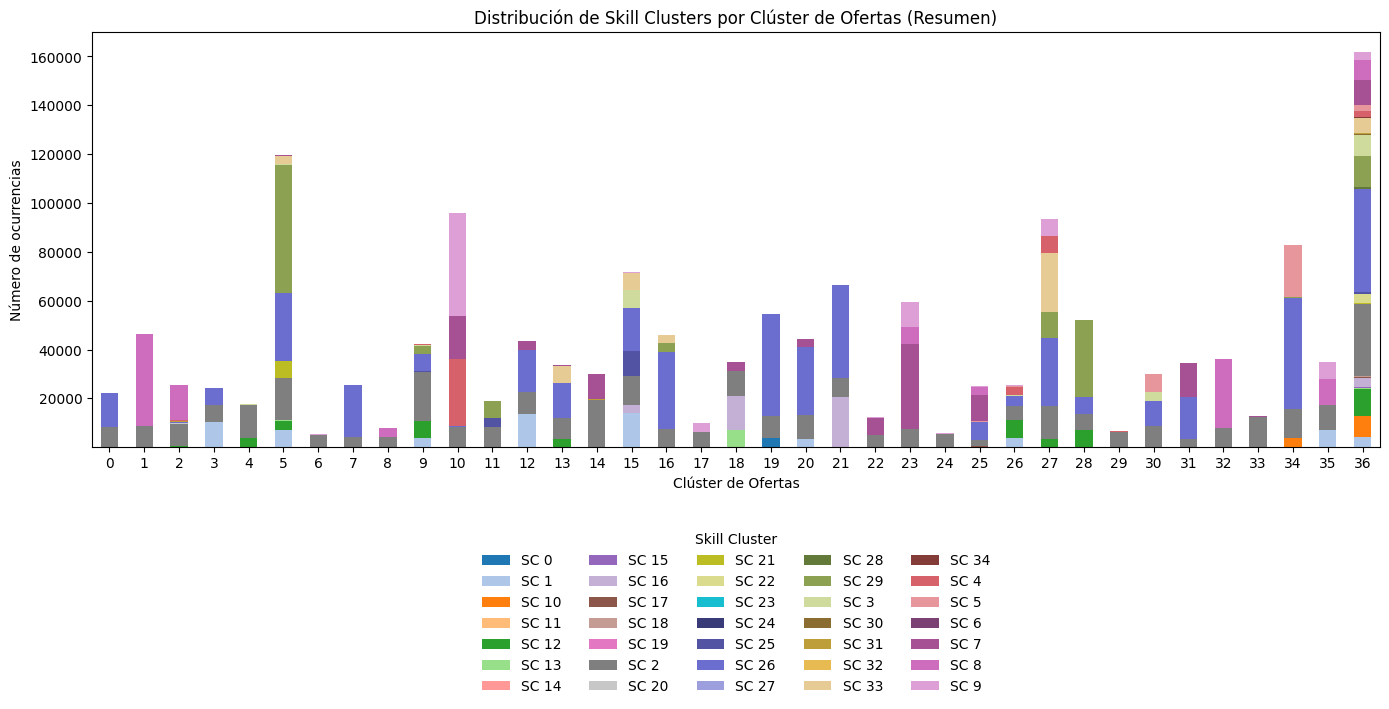

In [125]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

def generar_grafico_skill_clusters(df, columna_cluster="cluster", columna_skill="skill_clusters"):
    # Generar los datos para la visualización
    records = []
    for cluster_id in sorted(df[columna_cluster].dropna().unique()):
        subset = df[df[columna_cluster] == cluster_id]
        skill_clusters = subset[columna_skill].explode().dropna()
        top_clusters = Counter(skill_clusters).most_common(100)
        for c, count in top_clusters:
            records.append({"Oferta": cluster_id, "Skill Cluster": f"SC {c}", "Ocurrencias": count})

    df_resumen = pd.DataFrame(records)

    # Pivotar el DataFrame para crear la matriz de barras apiladas
    pivot_df = df_resumen.pivot(index="Oferta", columns="Skill Cluster", values="Ocurrencias").fillna(0)

    # Crear un colormap extendido con más colores
    colormap = ListedColormap(plt.cm.tab20.colors + plt.cm.tab20b.colors)  # Combinando tab20 y tab20b

    # Visualización con gráfico de barras apiladas
    plt.figure(figsize=(14, 8))  # Aumentar la altura de la figura
    pivot_df.plot(kind="bar", stacked=True, colormap=colormap, figsize=(14, 8))
    plt.title("Distribución de Skill Clusters por Clúster de Ofertas (Resumen)")
    plt.ylabel("Número de ocurrencias")
    plt.xlabel("Clúster de Ofertas")
    plt.xticks(rotation=0)
    
    # Configurar la leyenda en horizontal debajo con más altura
    plt.legend(title="Skill Cluster", bbox_to_anchor=(0.5, -0.4), loc='center', ncol=5, frameon=False)
    
    plt.tight_layout()
    plt.show()

# Llamada a la función con el dataframe 'combined_df'
generar_grafico_skill_clusters(combined_df)



<Figure size 1400x600 with 0 Axes>

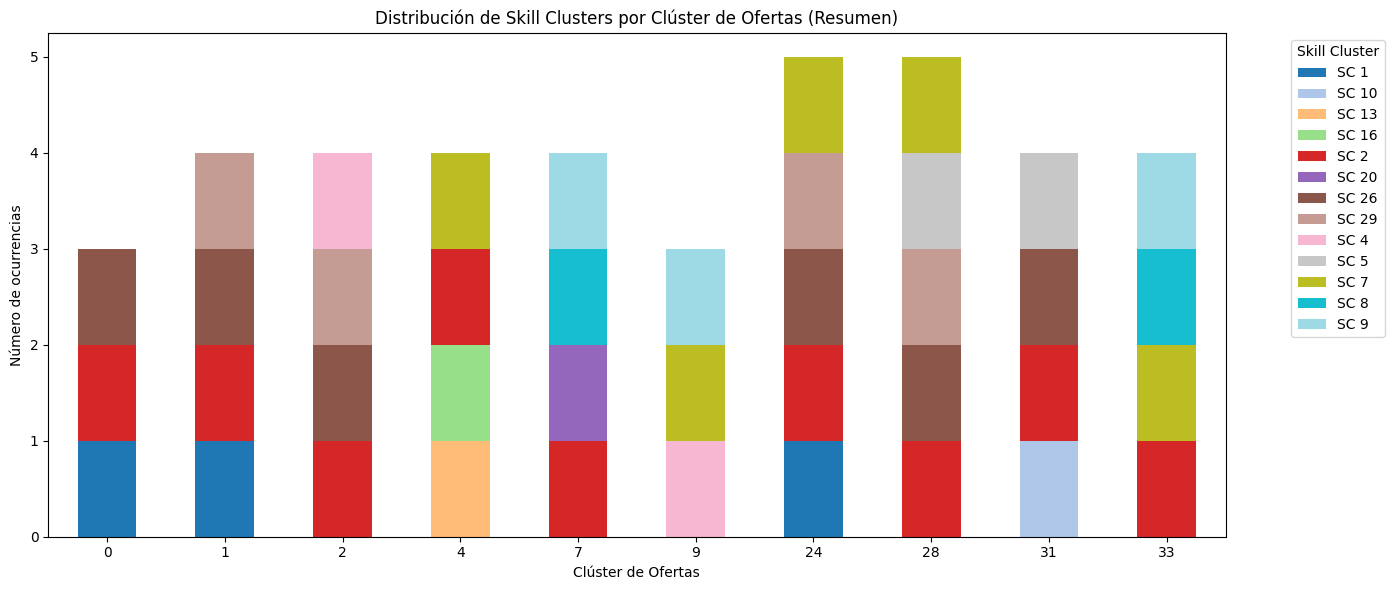

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Datos de ejemplo: resumen manual del usuario
# Creamos una lista de diccionarios para representar los datos más relevantes
resumen_data = [
    {"cluster_oferta": 0, "skill_clusters": [26, 2, 1]},
    {"cluster_oferta": 1, "skill_clusters": [26, 2, 1, 29]},
    {"cluster_oferta": 2, "skill_clusters": [26, 29, 2, 4]},
    {"cluster_oferta": 4, "skill_clusters": [16, 2, 13, 7]},
    {"cluster_oferta": 7, "skill_clusters": [8, 2, 9, 20]},
    {"cluster_oferta": 9, "skill_clusters": [9, 4, 7]},
    {"cluster_oferta": 24, "skill_clusters": [2, 26, 1, 7, 29]},
    {"cluster_oferta": 28, "skill_clusters": [26, 2, 29, 5, 7]},
    {"cluster_oferta": 31, "skill_clusters": [26, 10, 2, 5]},
    {"cluster_oferta": 33, "skill_clusters": [7, 9, 2, 8]},
]

# Convertir a DataFrame para análisis
records = []
for row in resumen_data:
    for skill in row["skill_clusters"]:
        records.append({"Oferta": row["cluster_oferta"], "Skill Cluster": f"SC {skill}"})

df_resumen = pd.DataFrame(records)

# Contar ocurrencias por grupo
conteo = df_resumen.groupby(["Oferta", "Skill Cluster"]).size().reset_index(name="Ocurrencias")

# Visualización con gráfico de barras apiladas
pivot_df = conteo.pivot(index="Oferta", columns="Skill Cluster", values="Ocurrencias").fillna(0)

plt.figure(figsize=(14, 6))
pivot_df.plot(kind="bar", stacked=True, colormap="tab20", figsize=(14, 6))
plt.title("Distribución de Skill Clusters por Clúster de Ofertas (Resumen)")
plt.ylabel("Número de ocurrencias")
plt.xlabel("Clúster de Ofertas")
plt.xticks(rotation=0)
plt.legend(title="Skill Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


EMpezamos con salario

In [127]:
combined_df.columns

Index(['qualifications', 'location', 'country', 'work type', 'company size',
       'job title', 'role', 'job description', 'benefits', 'skills',
       'responsibilities', 'company', 'company profile', 'min_experience',
       'max_experience', 'min_salary', 'max_salary', 'combined_text',
       'avg_salary', 'source', 'job_id', 'title', 'description', 'skill_abr',
       'formatted_experience_level', 'full_text', 'avg_annual',
       'full_text_df1', 'full_text_combined', 'skills_extraidas',
       'text_for_clustering', 'cluster', 'skill_clusters'],
      dtype='object')

In [128]:
combined_salary_df = combined_df.dropna(subset=["min_salary", "max_salary"]).copy()

combined_salary_df["avg_salary"] = combined_df["avg_salary"]

In [129]:
total = len(combined_df)
with_salary = combined_df.dropna(subset=["min_salary", "max_salary"])
num_with_salary = len(with_salary)
print(f"Ofertas con salario: {num_with_salary} de {total} ({num_with_salary / total:.1%})")

Ofertas con salario: 1642569 de 1676567 (98.0%)


Salarios con imoutacion por cluster

In [132]:
combined_salary_df["avg_salary_imputed"] = combined_salary_df.groupby("cluster")["avg_salary"].transform(lambda x: x.fillna(x.median()))

In [133]:
# Calcular medias por clúster
cluster_salary_means = combined_salary_df.groupby("cluster")["avg_salary"].mean()

In [134]:
# Aplicar imputación
for cluster_id, mean_salary in cluster_salary_means.items():
    mask = (combined_salary_df["cluster"] == cluster_id) & (combined_salary_df["avg_salary_imputed"].isna())
    combined_salary_df.loc[mask, "avg_salary_imputed"] = mean_salary

In [135]:
# Mostrar resumen de valores nulos después de imputación
null_count_after = combined_salary_df["avg_salary_imputed"].isna().sum()
null_count_after

np.int64(0)

In [136]:
combined_salary_df

,qualifications,location,country,work type,company size,job title,role,job description,benefits,skills,...,formatted_experience_level,full_text,avg_annual,full_text_df1,full_text_combined,skills_extraidas,text_for_clustering,cluster,skill_clusters,avg_salary_imputed
0,M.Tech,Douglas,Isle of Man,Intern,26801.0,Digital Marketing Specialist,Social Media Manager,social media managers oversee an organizations...,flexible spending accounts fsas relocation ass...,social media platforms eg facebook twitter ins...,...,NaN,NaN,NaN,Digital Marketing Specialist social media mana...,Digital Marketing Specialist social media mana...,,Digital Marketing Specialist social media man...,29,[],79000.0
1,BCA,Ashgabat,Turkmenistan,Intern,100340.0,Web Developer,Frontend Web Developer,frontend web developers design and implement u...,health insurance retirement plans paid time of...,html css javascript frontend frameworks eg rea...,...,NaN,NaN,NaN,Web Developer frontend web developers design a...,Web Developer frontend web developers design a...,design,design Web Developer frontend web developers d...,16,[26],86000.0
2,PhD,Macao,"Macao SAR, China",Temporary,84525.0,Operations Manager,Quality Control Manager,quality control managers establish and enforce...,legal assistance bonuses and incentive program...,quality control processes and methodologies st...,...,NaN,NaN,NaN,Operations Manager quality control managers es...,Operations Manager quality control managers es...,,Operations Manager quality control managers e...,30,[],82500.0
3,PhD,Porto-Novo,Benin,Full-Time,129896.0,Network Engineer,Wireless Network Engineer,wireless network engineers design implement an...,transportation benefits professional developme...,wireless network design and architecture wifi ...,...,NaN,NaN,NaN,Network Engineer wireless network engineers de...,Network Engineer wireless network engineers de...,"design, transportation, troubleshooting","design, transportation, troubleshooting Networ...",28,"[26, 2, 29]",78000.0
4,MBA,Santiago,Chile,Intern,53944.0,Event Manager,Conference Manager,a conference manager coordinates and manages c...,flexible spending accounts fsas relocation ass...,event planning conference logistics budget man...,...,NaN,NaN,NaN,Event Manager a conference manager coordinates...,Event Manager a conference manager coordinates...,coordination,coordination Event Manager a conference manage...,23,[7],75500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,midsenior level,sr bilingual copywriter canadian french overvi...,98550.0,NaN,sr bilingual copywriter canadian french overvi...,writing,writing sr bilingual copywriter canadian frenc...,36,[1],98550.0
1676545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,midsenior level,sr bilingual copywriter canadian french overvi...,98550.0,NaN,sr bilingual copywriter canadian french overvi...,writing,writing sr bilingual copywriter canadian frenc...,36,[1],98550.0
1676546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,midsenior level,sr bilingual copywriter canadian french overvi...,98550.0,NaN,sr bilingual copywriter canadian french overvi...,writing,writing sr bilingual copywriter canadian frenc...,36,[1],98550.0
1676547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,midsenior level,sr bilingual copywriter canadian french overvi...,98550.0,NaN,sr bilingual copywriter canadian french overvi...,writing,writing sr bilingual copywriter canadian frenc...,36,[1],98550.0


In [138]:
from collections import Counter

def ver_habilidades_por_cluster(df, cluster_id, columna_cluster="cluster", columna_skills="skills_extraidas"):
    subset = df[df[columna_cluster] == cluster_id]
    skills_col = subset[columna_skills].dropna()
    
    # Separar por comas, eliminar espacios y unificar formato
    skills_exploded = skills_col.str.split(",").explode().str.strip().str.lower()
    
    # Contar ocurrencias
    skill_counts = Counter(skills_exploded)
    
    print(f"\n🟦 Clúster de ofertas {cluster_id} — {len(subset)} ofertas")
    print("🔝 Top 20 habilidades:")
    for skill, count in skill_counts.most_common(20):
        print(f" - {skill}: {count}")
    
    return skill_counts  # por si lo quieres guardar o graficar

# Ejemplo de uso:
ver_habilidades_por_cluster(combined_df, cluster_id=24)



🟦 Clúster de ofertas 24 — 28224 ofertas
🔝 Top 20 habilidades:
 - : 22653
 - transportation: 5475
 - time management: 36
 - programming: 24
 - design: 20
 - administrative: 16
 - monitoring: 14
 - service orientation: 10
 - critical thinking: 6
 - science: 5
 - geography: 4
 - speaking: 3
 - coordination: 2
 - troubleshooting: 2


Counter({'': 22653,
         'transportation': 5475,
         'time management': 36,
         'programming': 24,
         'design': 20,
         'administrative': 16,
         'monitoring': 14,
         'service orientation': 10,
         'critical thinking': 6,
         'science': 5,
         'geography': 4,
         'speaking': 3,
         'coordination': 2,
         'troubleshooting': 2})

In [139]:
combined_salary_df["avg_salary_imputed_cluster"] = combined_salary_df.groupby("cluster")["avg_salary"].transform(lambda x: x.fillna(x.median()))


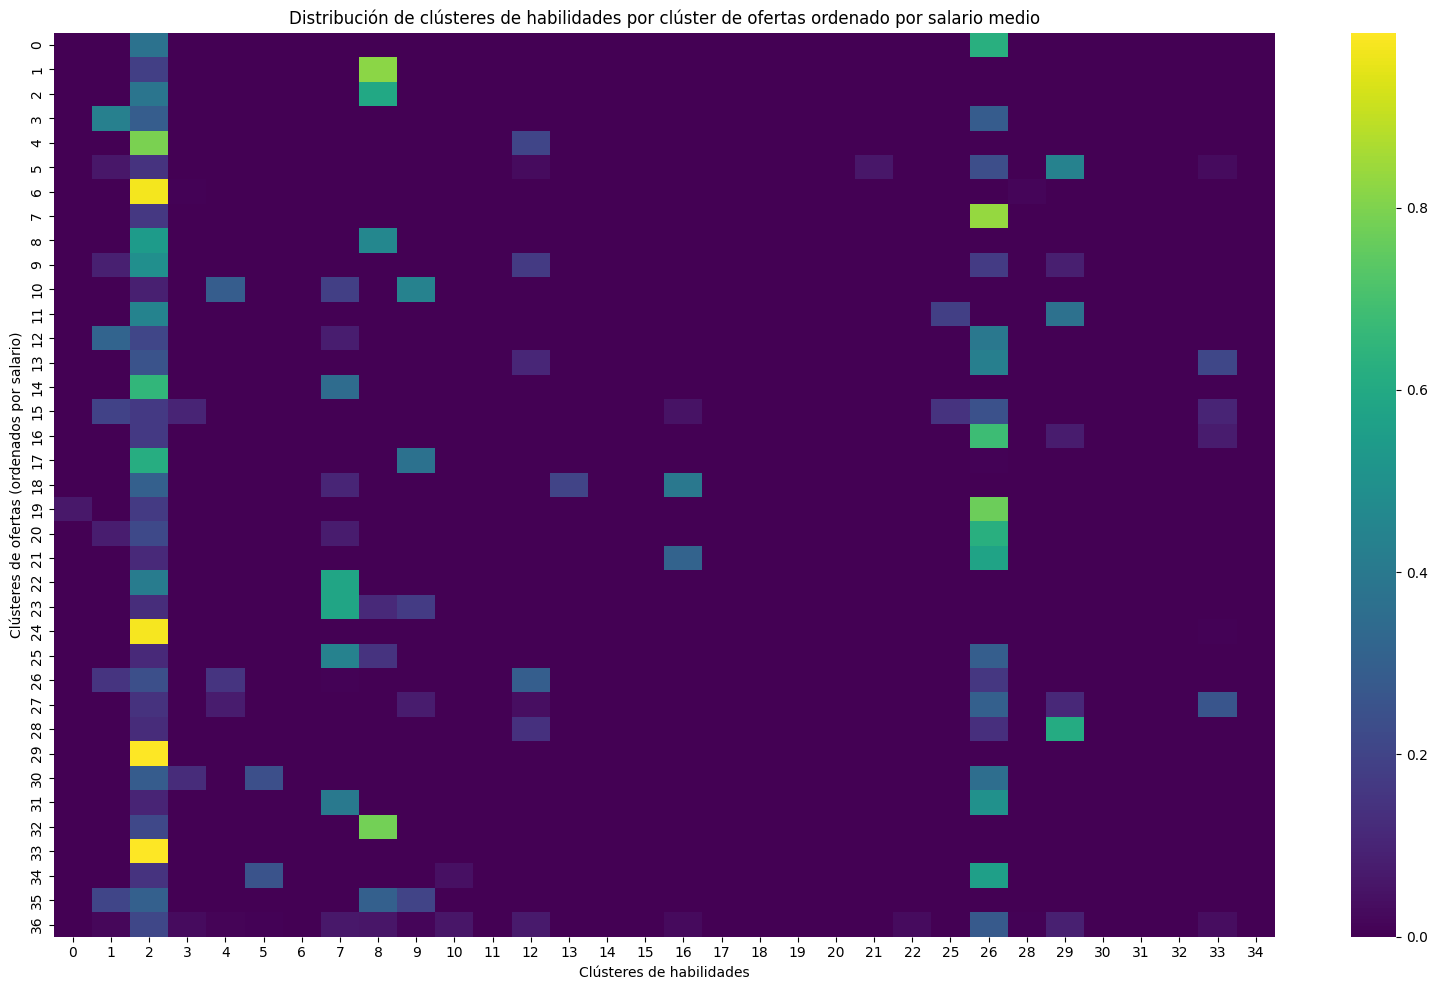

In [140]:
# Agrupar: media del salario por clúster de oferta y contar ocurrencias de cada clúster de skill
skill_cluster_counts = (
    combined_salary_df.explode("skill_clusters")  # Asegurarse que cada skill_cluster esté en una fila
    .groupby(["cluster", "skill_clusters"])
    .size()
    .unstack(fill_value=0)
)

# Media de salario por clúster de ofertas
salary_by_cluster = (
    combined_salary_df.groupby("cluster")["avg_salary_imputed"]
    .median()
    .rename("median_salary")
)

# Unir ambas tablas
analysis_df = skill_cluster_counts.join(salary_by_cluster)

# Normalizar las ocurrencias de clústeres de habilidades para visualizar proporciones
normalized_skills = skill_cluster_counts.div(skill_cluster_counts.sum(axis=1), axis=0)

# Crear un heatmap cruzando salarios con proporciones de clústeres de habilidades
plt.figure(figsize=(16, 10))
sns.heatmap(normalized_skills.join(salary_by_cluster).sort_values("median_salary", ascending=False).drop(columns="median_salary"), cmap="viridis")
plt.title("Distribución de clústeres de habilidades por clúster de ofertas ordenado por salario medio")
plt.xlabel("Clústeres de habilidades")
plt.ylabel("Clústeres de ofertas (ordenados por salario)")
plt.tight_layout()
plt.show()

In [141]:
combined_salary_df["avg_salary_imputed"]

0           79000.0
1           86000.0
2           82500.0
3           78000.0
4           75500.0
             ...   
1676544     98550.0
1676545     98550.0
1676546     98550.0
1676547     98550.0
1676556    122500.0
Name: avg_salary_imputed, Length: 1642569, dtype: float64

In [142]:
# Filtramos solo columnas necesarias para evitar uso excesivo de memoria
skills_subset = combined_df[["job_id", "skill_clusters"]].drop_duplicates("job_id")

# Hacemos merge solo con eso
combined_merged = combined_salary_df.merge(
    skills_subset,
    on="job_id",
    how="left")

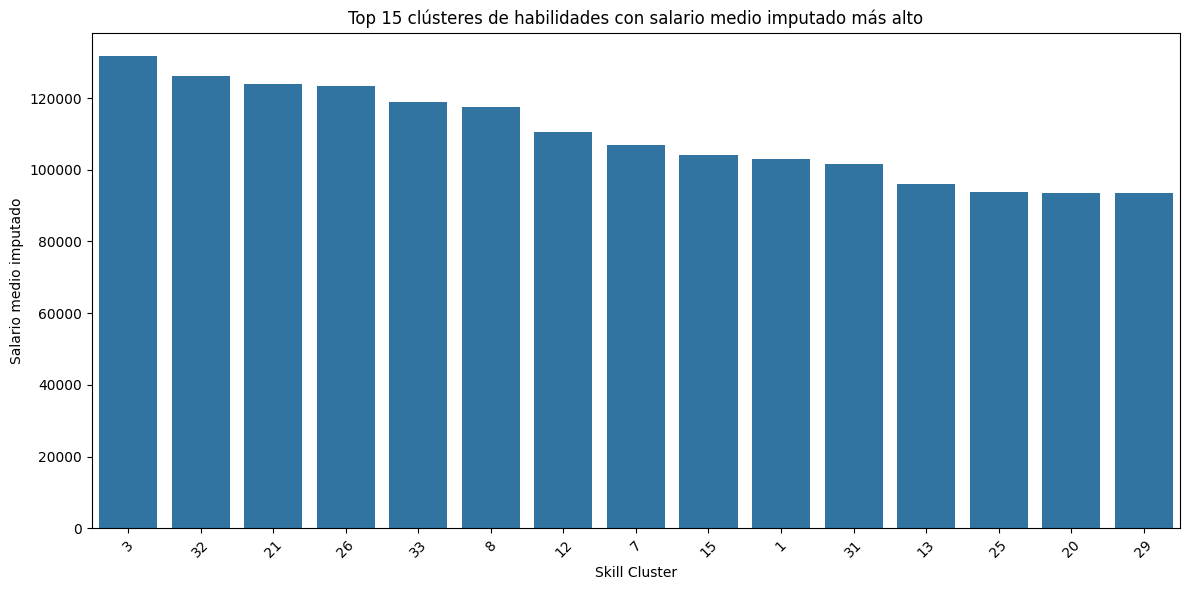

In [143]:
# 1. Filtramos y limpiamos job_id únicos
df_skills_clean = combined_df[['job_id', 'skill_clusters']].dropna()
df_salary_clean = combined_salary_df[['job_id', 'avg_salary_imputed']].dropna()

# 2. Eliminamos duplicados (nos interesa un único job_id por entrada)
df_skills_clean = df_skills_clean.drop_duplicates(subset='job_id')
df_salary_clean = df_salary_clean.drop_duplicates(subset='job_id')

# 3. Hacemos el merge limitado
df_merged = pd.merge(df_salary_clean, df_skills_clean, on='job_id', how='inner')

# 4. Expandimos
df_exploded = df_merged.explode('skill_clusters')

# 5. Calculamos los salarios promedio por skill_cluster
salary_by_skill_cluster = df_exploded.groupby('skill_clusters')['avg_salary_imputed'].mean().sort_values(ascending=False)

# 6. Visualizamos los 15 principales
plt.figure(figsize=(12, 6))
sns.barplot(x=salary_by_skill_cluster.head(15).index.astype(str), y=salary_by_skill_cluster.head(15).values)
plt.title("Top 15 clústeres de habilidades con salario medio imputado más alto")
plt.xlabel("Skill Cluster")
plt.ylabel("Salario medio imputado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [144]:



from collections import Counter

# Seleccionamos los top skill_clusters
top_clusters = salary_by_skill_cluster.head(40).index.tolist()

for cluster_id in top_clusters:
    habilidades = combined_df['skills_extraidas'][combined_df['skill_clusters'].apply(lambda scs: isinstance(scs, list) and cluster_id in scs)]
    habilidades = habilidades.dropna().str.split(', ').explode().str.strip()
    top_skills = Counter(habilidades).most_common(10)
    
    print(f"\n🟦 Skill Cluster {cluster_id} (top salario):")
    for skill, count in top_skills:
        print(f" - {skill}: {count}")



🟦 Skill Cluster 3 (top salario):
 - science: 11121
 - design: 10985
 - writing: 7757
 - chemistry: 7518
 - critical thinking: 3566
 - psychology: 3418
 - transportation: 2419
 - monitoring: 1559
 - programming: 1337
 - biology: 884

🟦 Skill Cluster 32 (top salario):
 - complex problem solving: 25
 - design: 4
 - critical thinking: 4
 - writing: 3
 - speaking: 2
 - programming: 2
 - monitoring: 1
 - time management: 1

🟦 Skill Cluster 21 (top salario):
 - systems analysis: 7141
 - troubleshooting: 3560
 - transportation: 1406
 - design: 81
 - science: 46
 - monitoring: 16
 - installation: 13
 - coordination: 12
 - programming: 11
 - administrative: 10

🟦 Skill Cluster 26 (top salario):
 - design: 427238
 - transportation: 91791
 - troubleshooting: 43075
 - coordination: 32607
 - writing: 32583
 - psychology: 23970
 - programming: 22726
 - mechanical: 22064
 - installation: 11351
 - science: 7153

🟦 Skill Cluster 33 (top salario):
 - programming: 52122
 - design: 22726
 - transportation

limpiar

In [146]:
# Convertir 'skill_clusters' a lista si viene como string
combined_salary_df["skill_clusters"] = combined_salary_df["skill_clusters"].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)

# Filtrar filas sin skill_clusters útiles
combined_salary_df = combined_salary_df[
    combined_salary_df["skill_clusters"].apply(lambda x: isinstance(x, list) and len(x) > 0)
]

# Limpiar skills_extraidas: quitar NaN, espacios y vacíos
combined_salary_df["skills_extraidas"] = combined_salary_df["skills_extraidas"].fillna("").str.strip()
combined_salary_df = combined_salary_df[combined_salary_df["skills_extraidas"] != ""]

# Convertir a lista, quitar blancos y eliminar genéricos
skills_to_exclude = {"", "transportation", "design"}

def limpiar_skills(skills_str):
    skills = [s.strip() for s in skills_str.split(',')]
    skills_filtradas = [s for s in skills if s.lower() not in skills_to_exclude]
    return ', '.join(skills_filtradas)

combined_salary_df["skills_extraidas"] = combined_salary_df["skills_extraidas"].apply(limpiar_skills)

# Eliminar filas que hayan quedado sin skills después de la limpieza
combined_salary_df = combined_salary_df[combined_salary_df["skills_extraidas"] != ""]



C:\Users\maria\AppData\Local\Temp\ipykernel_28156\1278600100.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='skill_clusters', ylabel='cluster'>

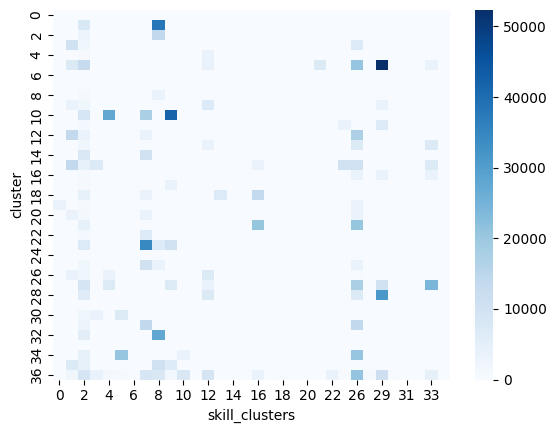

In [147]:
cross_counts = (
    combined_salary_df.explode("skill_clusters")
    .groupby(["cluster", "skill_clusters"])
    .size()
    .unstack(fill_value=0)
)

sns.heatmap(cross_counts, cmap="Blues")

| Skill Cluster | Salario medio aprox. | Habilidades dominantes (de análisis previo)               |
| ------------- | -------------------- | --------------------------------------------------------- |
| 3             | 109 k €              | science, design, chemistry, critical thinking             |
| 8             | 102 k €              | negotiation, coordination, leadership                     |
| 26            | 101 k €              | diseño técnico, troubleshooting, mechanical, programación |
| 20            | 94 k €               | persuasion, negotiation, análisis de operaciones          |
| 12            | 89 k €               | monitoring, troubleshooting, gestión del tiempo           |


<Axes: xlabel='skill_clusters', ylabel='cluster'>

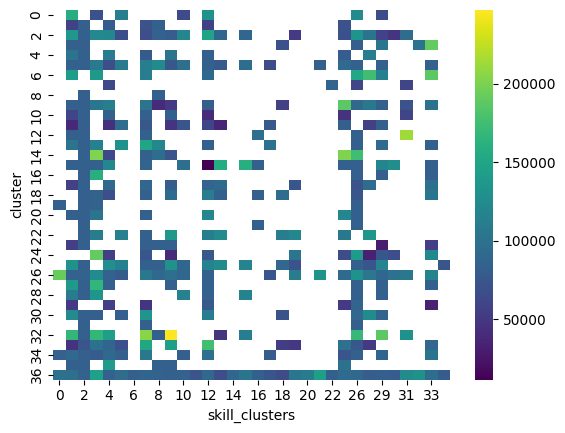

In [148]:
df_exp = combined_salary_df.explode("skill_clusters")
salary_matrix = df_exp.groupby(["cluster", "skill_clusters"])["avg_salary_imputed"].mean().unstack()

sns.heatmap(salary_matrix, cmap="viridis")


In [149]:
from collections import Counter

for c in df_exp["cluster"].unique():
    top = (
        df_exp[df_exp["cluster"] == c]["skills_extraidas"]
        .dropna().str.split(", ").explode().str.strip()
    )
    print(f"🟦 Cluster {c} → Top habilidades:")
    print(Counter(top).most_common(5))


🟦 Cluster 28 → Top habilidades:
[('troubleshooting', 51858), ('monitoring', 19116), ('installation', 46), ('science', 17), ('writing', 4)]
🟦 Cluster 23 → Top habilidades:
[('coordination', 58743), ('administration and management', 22757), ('negotiation', 15051), ('programming', 6), ('writing', 6)]
🟦 Cluster 21 → Top habilidades:
[('psychology', 45275)]
🟦 Cluster 31 → Top habilidades:
[('coordination', 30653)]
🟦 Cluster 13 → Top habilidades:
[('programming', 15656), ('monitoring', 4224), ('science', 123), ('writing', 118), ('troubleshooting', 82)]
🟦 Cluster 34 → Top habilidades:
[('mechanical', 49028), ('installation', 11033), ('troubleshooting', 214), ('programming', 83), ('equipment selection', 76)]
🟦 Cluster 32 → Top habilidades:
[('negotiation', 33644), ('time management', 58), ('coordination', 54), ('science', 32), ('writing', 32)]
🟦 Cluster 3 → Top habilidades:
[('writing', 19311), ('english language', 6), ('complex problem solving', 6), ('programming', 6), ('troubleshooting', 6)]

In [150]:
file_path = "combined_salary_with_skills.csv"
combined_salary_df.to_csv(file_path, index=False)

In [151]:
combined_df["job title"]

0          Digital Marketing Specialist
1                         Web Developer
2                    Operations Manager
3                      Network Engineer
4                         Event Manager
                       ...             
1676562                             NaN
1676563                             NaN
1676564                             NaN
1676565                             NaN
1676566                             NaN
Name: job title, Length: 1676567, dtype: object

In [152]:
# Cargar el notebook proporcionado por el usuario para analizar cómo se genera la información
skill_cluster_df.to_csv("skills_clustered.csv", index=False)

In [153]:
combined_df.to_csv("data/combined_df.csv", index=False)


In [154]:
import joblib
joblib.dump(skill_to_cluster, "skill_to_cluster.pkl")

['skill_to_cluster.pkl']

In [155]:
import pickle

In [156]:
np.save("data/skill_embeddings.npy", skill_embeddings)
with open("data/unique_skills.pkl", "wb") as f:
    pickle.dump(unique_skills, f)

In [157]:
np.save("data/skill_embeddings.npy", skill_embeddings)
with open("data/unique_skills.pkl", "wb") as f:
    pickle.dump(unique_skills, f)

skill_cluster_df.to_csv("data/skill_cluster_df.csv", index=False)
with open("data/skill_to_cluster.pkl", "wb") as f:
    pickle.dump(skill_to_cluster, f)


In [158]:
combined_salary_df.to_csv("data/ofertas_con_salario_cluster.csv", index=False)

